In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#data of 43003 table 2


df032 = pd.read_csv('/content/drive/MyDrive/aaamini/P2/imd 10 year data/43003_Table_2_Daily_NDCQ-2025-02-010.csv',
                    index_col=False, header=0)

x=['TS',    'N',    'FFF'   ,'D',   'TOCSQ',    'DU','Unnamed: 39','EVP','T.2', 'G.2', 'DUR.2', 'T.3', 'G.3', 'DUR.3']
df032.drop(x,axis=1,inplace=True)

df032[df032.select_dtypes('object').columns] = df032.select_dtypes('object').apply(pd.to_numeric, errors='coerce')

time_map = {1: "12:01 AM to 3:00 AM", 2: "3:01 AM to 6:00 AM", 3: "6:01 AM to 9:00 AM", 4: "9:01 AM to 12:00 PM",
            5: "12:01 PM to 3:00 PM", 6: "3:01 PM to 6:00 PM", 7: "6:01 PM to 9:00 PM", 8: "9:01 PM to 12:00 AM"}

df032[['G', 'G.1']] = df032[['G', 'G.1']].applymap(time_map.get)

<ipython-input-1-f016ce6625da>:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df032[['G', 'G.1']] = df032[['G', 'G.1']].applymap(time_map.get)


In [ ]:
#data of 42970 table 2


df702 = pd.read_csv('/content/drive/MyDrive/aaamini/P2/imd 10 year data/42970_Table_2_Daily_NDCQ-2025-02-010.csv', index_col=False, header=0)
y=['TS',	'N',	'FFF'	,'D',	'TOCSQ',	'DU','Unnamed: 39','EVP','T.2', 'G.2', 'DUR.2', 'T.3', 'G.3', 'DUR.3']
df702.drop(x,axis=1,inplace=True)
df702[df032.select_dtypes('object').columns] = df032.select_dtypes('object').apply(pd.to_numeric, errors='coerce')
df702m = df702.iloc[:, :7]
df032m = df032.iloc[:, :7]

df032m['datetime'] = pd.to_datetime(
    df032m[['YEAR', 'MN', 'DT']].copy().rename(columns={'YEAR': 'year', 'MN': 'month', 'DT': 'day'})
)

df032m['datetime'] = pd.to_datetime(
    df032m['YEAR'].astype(str) + '-' +
    df032m['MN'].astype(str).str.zfill(2) + '-' +
    df032m['DT'].astype(str).str.zfill(2)
)


df032m['year'] = df032m['datetime'].dt.year
df032m['day'] = df032m['datetime'].dt.day
df032m['month_name'] = df032m['datetime'].dt.strftime('%B')
df032m['day_name'] = df032m['datetime'].dt.strftime('%A')
#print(df702m[['YEAR', 'MN', 'DT']].unique())
df032m.drop(columns=['YEAR', 'MN', 'DT', 'year', 'MN', 'DT'], inplace=True)

# Step 1: Create datetime column from YEAR, MN, DT
df702m['datetime'] = pd.to_datetime(
    df702m['YEAR'].astype(str) + '-' +
    df702m['MN'].astype(str).str.zfill(2) + '-' +
    df702m['DT'].astype(str).str.zfill(2)
)

# Step 2: Extract clean components
df702m['year'] = df702m['datetime'].dt.year
df702m['day'] = df702m['datetime'].dt.day
df702m['month_name'] = df702m['datetime'].dt.strftime('%B')
df702m['day_name'] = df702m['datetime'].dt.strftime('%A')

# Step 3: Drop original columns
df702m.drop(columns=['YEAR', 'MN', 'DT', 'year', 'month', 'date'], inplace=True, errors='ignore')


# For df032m
df032m['MAX'] = df032m.apply(
    lambda row: row['MAX'] if pd.notnull(row['MAX']) or row['MAX'] > row['MIN'] else None, axis=1)
df032m['MIN'] = df032m.apply(
    lambda row: row['MIN'] if pd.notnull(row['MIN']) or row['MIN'] < row['MAX'] else None, axis=1)
# For df702m
df702m['MAX'] = df702m.apply(
    lambda row: row['MAX'] if pd.notnull(row['MAX']) or row['MAX'] > row['MIN'] else None, axis=1)
df702m['MIN'] = df702m.apply(
    lambda row: row['MIN'] if pd.notnull(row['MIN']) or row['MIN'] < row['MAX'] else None, axis=1)

df032m[['MAX', 'MIN']] = df032m[['MAX', 'MIN']].ffill()
df702m[['MAX', 'MIN']] = df702m[['MAX', 'MIN']].ffill()

<ipython-input-3-47f7011e04ca>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_odi1= df_odi.fillna(method= 'ffill', limit= 3)
<ipython-input-3-47f7011e04ca>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pov1= df_pov.fillna(method= 'ffill', limit= 3)
<ipython-input-3-47f7011e04ca>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pov1.fillna(method= 'bfill',limit= 3, inplace= True)


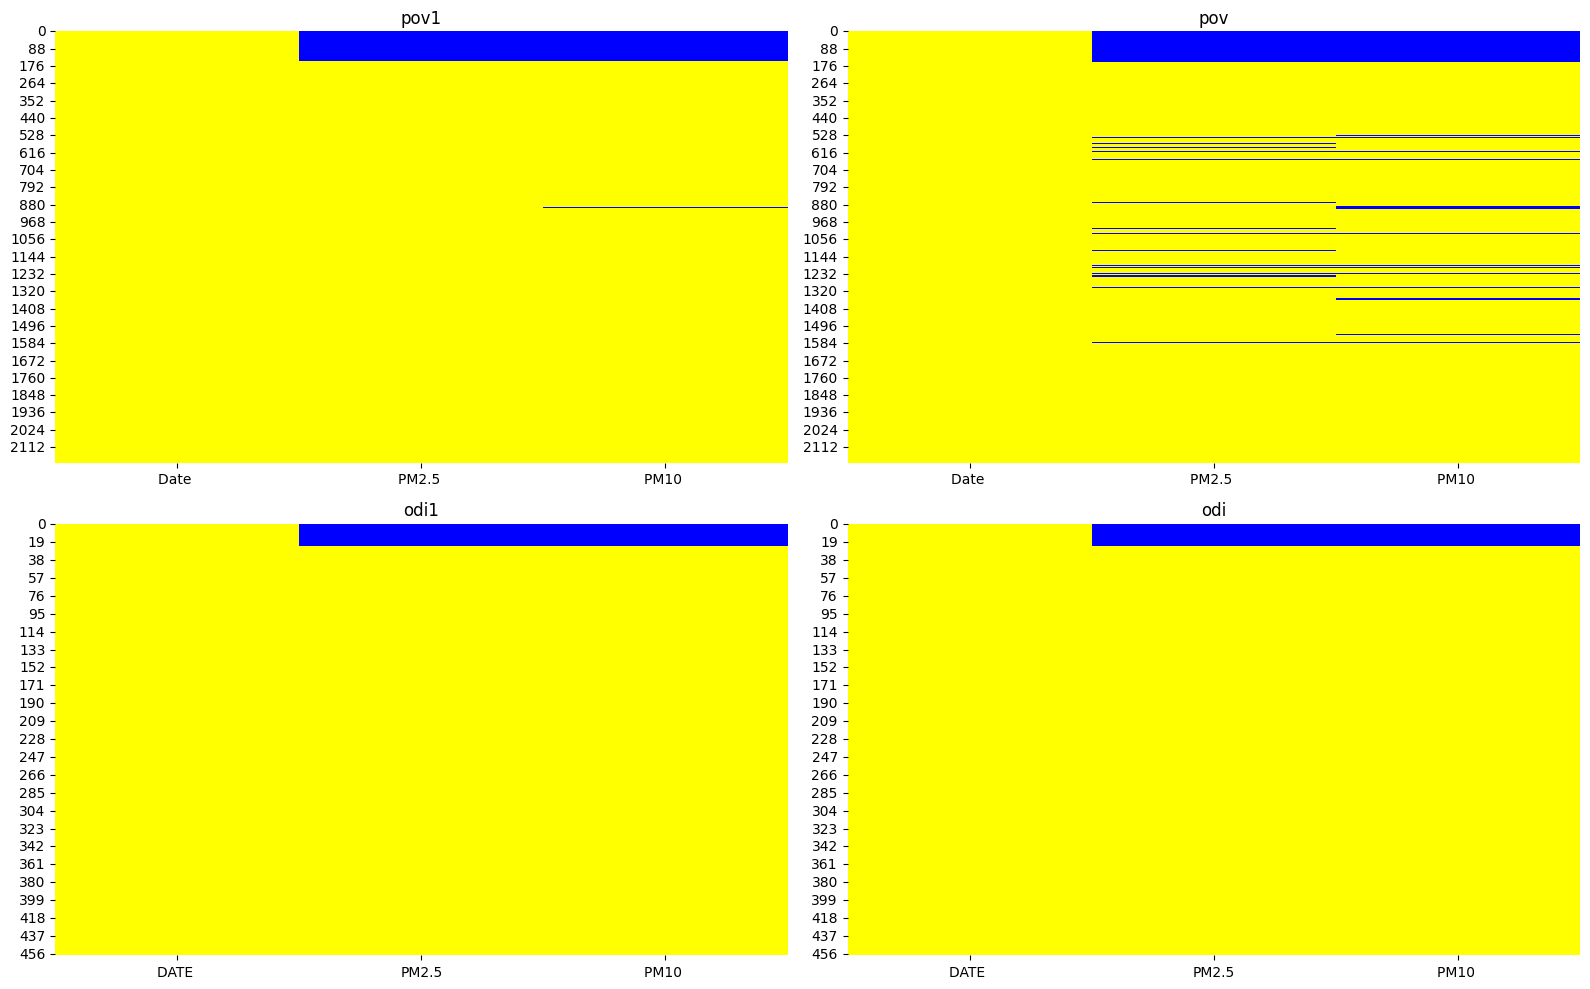

In [ ]:
#here
df_odi= pd.read_excel('/content/drive/MyDrive/aaamini/P2/BARDIL_ODDISHA.xlsx')

df_pov= pd.read_excel('/content/drive/MyDrive/aaamini/P2/POVAI_AQI.xlsx')

#to fill missing values
df_odi1= df_odi.fillna(method= 'ffill', limit= 3)
df_pov1= df_pov.fillna(method= 'ffill', limit= 3)
df_pov1.fillna(method= 'bfill',limit= 3, inplace= True)


#to plot a graph to understand distribution of missing values before and after cleaning

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
sns.heatmap(df_pov1.isnull(), ax=axes[0, 0], cmap=['yellow', 'blue'], cbar=False)
axes[0, 0].set_title('pov1')
sns.heatmap(df_pov.isnull(), ax=axes[0, 1], cmap=['yellow', 'blue'], cbar=False)
axes[0, 1].set_title('pov')
sns.heatmap(df_odi1.isnull(), ax=axes[1, 0], cmap=['yellow', 'blue'], cbar=False)
axes[1, 0].set_title('odi1')
sns.heatmap(df_odi.isnull(), ax=axes[1, 1], cmap=['yellow', 'blue'], cbar=False)
axes[1, 1].set_title('odi')
plt.tight_layout()
plt.show()

     INDEX   MAX   MIN   AW       Date  day month_name   day_name  PM2.5   \
0  43003.0  34.5  28.0  6.0 2019-06-01  1.0       June   Saturday   30.16   
1  43003.0  35.1  27.6  6.0 2019-06-02  2.0       June     Sunday   30.16   
2  43003.0  34.5  29.4  7.0 2019-06-03  3.0       June     Monday   30.16   
3  43003.0  35.0  28.7  8.0 2019-06-04  4.0       June    Tuesday   30.16   
4  43003.0  34.4  28.5  5.0 2019-06-05  5.0       June  Wednesday   27.17   

   PM10   
0  76.39  
1  76.39  
2  76.39  
3  76.39  
4  68.29  
INDEX         0
MAX           0
MIN           0
AW            0
Date          0
day           0
month_name    0
day_name      0
PM2.5         0
PM10          0
dtype: int64


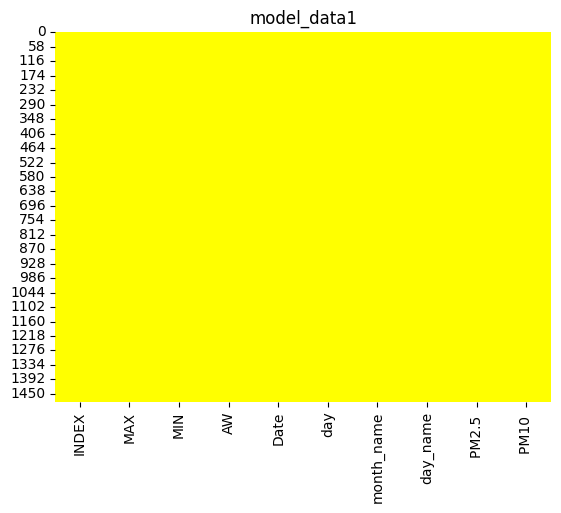

In [ ]:
# mumabi- powai data
df_pov1 = df_pov1.rename(columns={'Date ': 'Date'})
df032m = df032m.rename(columns={'datetime': 'Date'})

def merge_on_date_full_outer(big_df, small_df):

  '''merege 2 datasets of different sizes onto common date range. this is done as we had recieved data of different time range, but hving common target range'''

  big_df['Date'] = pd.to_datetime(big_df['Date'])
  small_df['Date'] = pd.to_datetime(small_df['Date'])
  merged_df = pd.merge(big_df, small_df, on='Date', how='outer')
  merged_df = merged_df.sort_values('Date').reset_index(drop=True)

  return merged_df



merged_df = merge_on_date_full_outer(df032m, df_pov1)

model_data1= merged_df.dropna()
model_data1.reset_index(drop=True, inplace=True)
#print(model_data1.head())


#final clean data without missing values

model_data1= merged_df.dropna()
model_data1.reset_index(drop=True, inplace=True)
print(model_data1.head())

#visually representing clean data

print(model_data1.isna().sum())
sns.heatmap(model_data1.isna(), cmap=['yellow', 'blue'], cbar=False)
plt.title('model_data1')
plt.show()

In [ ]:
#target columns
print(model_data1.columns)
model_data1.rename(columns= {'PM10 ': 'PM10', 'PM2.5 ': 'PM2.5'}, inplace= True)
print(model_data1.columns)

Index(['INDEX', 'MAX', 'MIN', 'AW', 'Date', 'day', 'month_name', 'day_name',
       'PM2.5 ', 'PM10 '],
      dtype='object')
Index(['INDEX', 'MAX', 'MIN', 'AW', 'Date', 'day', 'month_name', 'day_name',
       'PM2.5', 'PM10'],
      dtype='object')


<ipython-input-6-500251eba654>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data1.rename(columns= {'PM10 ': 'PM10', 'PM2.5 ': 'PM2.5'}, inplace= True)


In [ ]:
'''
creating a nueral network with long short term memory (LSTM) in order to learn features, but not stay stringent to them.
it should be a temporal learning, evolving with time and newer data entries.

Structure of fully connected feed-forward neural network (FCN) :
input_layer       =   256 neurons
1st_hidden_layer  =   64 neurons
output_layer      =   2 neurons

the input & 1st hidden layer neuron count is achived by several trial and test basis to attain maximum accurary while not letting the model be overfit.
the output layer contains 2 neurons as only 2 predicting values PM2.5 & PM10 are out target attributes.
the model is fitted with 200 epochs i.e model will be learning same pattern 200 times.
the model is fitted with batch size 5 i.e model will be learning only 5 entires as a time.
we've used r-square test to validate model's accuracy.

'''
model = Sequential()
model.add(LSTM(units=256, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=2))  # Predicting PM2.5 and PM10
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=5, validation_data=(X_test, y_test))

# === Evaluation ===

y_pred = model.predict(X_test)
y_pred_actual = scaler_Y.inverse_transform(y_pred)
y_test_actual = scaler_Y.inverse_transform(y_test)

r2 = r2_score(y_test_actual, y_pred_actual)
print(f"R-squared on test set: {r2}")

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression

# Use same inputs (not sequences)
X_lin = features
y_lin = target

lr = LinearRegression()
lr.fit(X_lin, y_lin)

# Get formula for PM2.5
pm25_eq = "PM2.5 = "
for i, col in enumerate(features.columns):
    pm25_eq += f"{lr.coef_[0][i]:.4f} * {col} + "
pm25_eq += f"{lr.intercept_[0]:.4f}"

# Get formula for PM10
pm10_eq = "PM10 = "
for i, col in enumerate(features.columns):
    pm10_eq += f"{lr.coef_[1][i]:.4f} * {col} + "
pm10_eq += f"{lr.intercept_[1]:.4f}"

print(pm25_eq)
print(pm10_eq)


PM2.5 = 0.0000 * INDEX + 3.3150 * MAX + -4.6039 * MIN + -2.5933 * AW + 48.1042
PM10 = 0.0000 * INDEX + 7.6420 * MAX + -6.9687 * MIN + -4.1669 * AW + 15.7419


     INDEX   MAX   MIN  AW       Date  day month_name   day_name  PM2.5   PM10
0  42970.0  35.6  26.0     2024-06-01  1.0       June   Saturday  11.77  51.68
1  42970.0  36.0  28.4     2024-06-02  2.0       June     Sunday  12.57  52.65
2  42970.0  34.8  21.5     2024-06-03  3.0       June     Monday  14.48  68.95
3  42970.0  38.2  26.5     2024-06-04  4.0       June    Tuesday  17.66  75.81
4  42970.0  37.0  26.0     2024-06-05  5.0       June  Wednesday  13.49  55.00
INDEX         0
MAX           0
MIN           0
AW            0
Date          0
month_name    0
day_name      0
PM2.5         0
PM10          0
dtype: int64


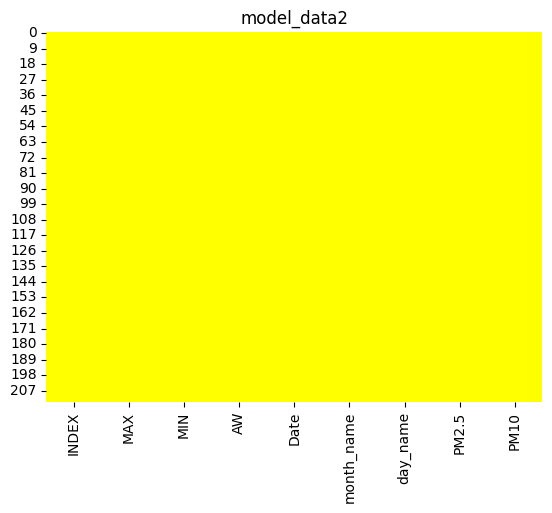

In [ ]:
# odisha data

df_odi1 = df_odi1.rename(columns={'DATE ': 'Date', 'PM10 ': 'PM10', 'PM2.5 ': 'PM2.5'})
df702m = df702m.rename(columns={'datetime': 'Date'})

#merged_df2 = merge_on_date_full_outer(df702m, df_odi1)

model_data2= merge_on_date_full_outer(df702m, df_odi1).dropna()
model_data2.reset_index(drop=True, inplace=True)
print(model_data2.head())

model_data2.drop(columns={'day'}, inplace= True)
print(model_data2.isna().sum())
sns.heatmap(model_data2.isna(), cmap=['yellow', 'blue'], cbar=False)
plt.title('model_data2')
plt.show()


# === Preprocessing ===

# Convert datetime column to numeric features
if 'datetime' in model_data2.columns:
    model_data2['year'] = model_data2['datetime'].dt.year
    model_data2['month'] = model_data2['datetime'].dt.month
    model_data2['day'] = model_data2['datetime'].dt.day
    model_data2['hour'] = model_data2['datetime'].dt.hour
    model_data2['dayofweek'] = model_data2['datetime'].dt.dayofweek
    model_data2 = model_data2.drop(columns=['datetime'])

In [ ]:
model_data2.head()

,INDEX,MAX,MIN,AW,Date,month_name,day_name,PM2.5,PM10
0,42970.0,35.6,26.0,,2024-06-01,June,Saturday,11.77,51.68
1,42970.0,36.0,28.4,,2024-06-02,June,Sunday,12.57,52.65
2,42970.0,34.8,21.5,,2024-06-03,June,Monday,14.48,68.95
3,42970.0,38.2,26.5,,2024-06-04,June,Tuesday,17.66,75.81
4,42970.0,37.0,26.0,,2024-06-05,June,Wednesday,13.49,55.00


In [ ]:
import numpy as np
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :-2]  # Features up to look_back
        X.append(a)
        Y.append(dataset[i + look_back, -2:])  # Targets (PM2.5, PM10)
    return np.array(X), np.array(Y)

# Drop any non-numeric columns

from sklearn.preprocessing import MinMaxScaler
model_data2 = model_data2.select_dtypes(include=[np.number])

features = model_data2.drop(['PM2.5', 'PM10'], axis=1)
target = model_data2[['PM2.5', 'PM10']]
# Normalize features and target
scaler_X2 = MinMaxScaler()
scaler_Y2 = MinMaxScaler()


features_scaled2 = scaler_X2.fit_transform(features.select_dtypes(include=[np.number]))
target_scaled2 = scaler_Y2.fit_transform(target)


combined_scaled2 = np.hstack((features_scaled2, target_scaled2))
window_size = 30
X, y = create_dataset(combined_scaled2, window_size) # Calling the newly defined function

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
model_data2.head()

,INDEX,MAX,MIN,day,PM2.5,PM10
0,42970.0,35.6,26.0,1.0,11.77,51.68
1,42970.0,36.0,28.4,2.0,12.57,52.65
2,42970.0,34.8,21.5,3.0,14.48,68.95
3,42970.0,38.2,26.5,4.0,17.66,75.81
4,42970.0,37.0,26.0,5.0,13.49,55.00


In [ ]:
# Drop any non-numeric columns

from sklearn.preprocessing import MinMaxScaler
model_data2 = model_data2.select_dtypes(include=[np.number])
features = model_data2.drop(['PM2.5', 'PM10'], axis=1)
target = model_data2[['PM2.5', 'PM10']]
# Normalize features and target
scaler_X2 = MinMaxScaler()
scaler_Y2 = MinMaxScaler()


features_scaled2 = scaler_X2.fit_transform(features.select_dtypes(include=[np.number]))
target_scaled2 = scaler_Y2.fit_transform(target)


combined_scaled2 = np.hstack((features_scaled2, target_scaled2))
window_size = 30
X, y = create_dataset(combined_scaled2, window_size)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
#not needed
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score

In [ ]:
'''
creating a nueral network with long short term memory (LSTM) in order to learn features, but not stay stringent to them.
it should be a temporal learning, evolving with time and newer data entries.

Structure of fully connected feed-forward neural network (FCN) :
input_layer       =   256 neurons
1st_hidden_layer  =   64 neurons
output_layer      =   2 neurons

the input & 1st hidden layer neuron count is achived by several trial and test basis to attain maximum accurary while not letting the model be overfit.
the output layer contains 2 neurons as only 2 predicting values PM2.5 & PM10 are out target attributes.
the model is fitted with 75 epochs i.e model will be learning same pattern 200 times.
the model is fitted with batch size 40 i.e model will be learning only 5 entires as a time.
the model is compiled using Adam optimizer

the model uses r-square test to validate model's accuracy.

'''



model = Sequential()
model.add(LSTM(units=256, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=2))  # Predicting PM2.5 and PM10
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=75, batch_size=40, validation_data=(X_test, y_test))

# === Evaluation ===

y_pred = model.predict(X_test)
y_pred_actual = scaler_Y2.inverse_transform(y_pred)
y_test_actual = scaler_Y2.inverse_transform(y_test)

r2 = r2_score(y_test_actual, y_pred_actual)
print(f"R-squared on test set: {r2}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 265ms/step - loss: 0.1146 - val_loss: 0.0777
Epoch 2/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - loss: 0.0579 - val_loss: 0.0657
Epoch 3/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.0583 - val_loss: 0.0665
Epoch 4/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.0578 - val_loss: 0.0375
Epoch 5/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 0.0308 - val_loss: 0.0404
Epoch 6/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - loss: 0.0282 - val_loss: 0.0343
Epoch 7/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.0278 - val_loss: 0.0387
Epoch 8/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - loss: 0.0250 - val_loss: 0.0322
Epoch 9/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.0210 - val_loss: 0.0323
Epoch 10/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - loss: 0.0207 - val_loss: 0.0395
Epoch 11/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - loss: 0.0254 - val_loss: 0.0341
Epoch 12/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step - loss: 0.0231 - val_lo

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd

# 1. Prepare data from model_data2
features = model_data2.drop(columns=['PM2.5', 'PM10'])
target = model_data2[['PM2.5', 'PM10']]

# 2. Convert to numeric and drop rows with any NaNs
X_lin_clean = features.apply(pd.to_numeric, errors='coerce')
y_lin_clean = target.apply(pd.to_numeric, errors='coerce')

combined = pd.concat([X_lin_clean, y_lin_clean], axis=1).dropna()

# 3. Split back into features (X) and target (y)
X_lin = combined.iloc[:, :X_lin_clean.shape[1]]
y_lin = combined.iloc[:, X_lin_clean.shape[1]:]

# 4. Fit linear regression model
lr = LinearRegression()
lr.fit(X_lin, y_lin)

# 5. Get equation for PM2.5
pm25_eq = "PM2.5 = "
for i, col in enumerate(X_lin.columns):
    pm25_eq += f"{lr.coef_[0][i]:.4f} * {col} + "
pm25_eq += f"{lr.intercept_[0]:.4f}"

# 6. Get equation for PM10
pm10_eq = "PM10 = "
for i, col in enumerate(X_lin.columns):
    pm10_eq += f"{lr.coef_[1][i]:.4f} * {col} + "
pm10_eq += f"{lr.intercept_[1]:.4f}"

print(pm25_eq)
print(pm10_eq)

# 7. Plotting predictions vs actuals (this assumes y_pred_actual and y_test_actual are already defined)
# PM2.5
plt.figure(figsize=(20, 6))
plt.plot(y_pred_actual[:, 0], label='Predicted PM2.5', alpha=0.6)
plt.plot(y_test_actual[:, 0], label='Actual PM2.5', alpha=0.6)
plt.xlabel('Time Step')
plt.ylabel('PM2.5 Values')
plt.title('Predicted vs. Actual PM2.5 Values for Orissa')
plt.legend()
plt.grid(True)
plt.show()

# PM10
plt.figure(figsize=(20, 6))
plt.plot(y_pred_actual[:, 1], label='Predicted PM10', alpha=0.6)
plt.plot(y_test_actual[:, 1], label='Actual PM10', alpha=0.6)
plt.xlabel('Time Step')
plt.ylabel('PM10 Values')
plt.title('Predicted vs. Actual PM10 Values for Orissa')
plt.legend()
plt.grid(True)
plt.show()


ValueError: Found array with 0 sample(s) (shape=(0, 7)) while a minimum of 1 is required by LinearRegression.